In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('df.csv')
df.head()

,id,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2283743,2,2019-02-19T08:02:58Z,2019-02-19T08:32:22Z,33.729698,-84.392586,33.729698,-84.392586,0.00,Right hand shoulder blocked due to accident on...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-1567861,2,2017-02-13T20:51:52Z,2017-02-13T21:21:39Z,43.194069,-83.727097,NaN,NaN,0.01,Accident on M-54 Saginaw Rd near Tuscola Rd.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-423709,2,2020-05-22T18:20:00Z,2020-05-22T19:11:35Z,34.000071,-118.409001,34.000071,-118.409001,0.00,At Braddock Dr/Exit 51 - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-864136,2,2020-03-03T07:47:18Z,2020-03-03T09:17:12Z,32.675549,-96.757278,32.675549,-96.757278,0.00,Accident on Simpson Stuart Rd at Flagstaff Dr.,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2792470,2,2020-01-22T08:05:34Z,2020-01-22T12:05:34Z,42.879050,-121.831060,42.879050,-121.831060,0.00,At Silver Lake Rd/W Boundary Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df.shape

(5000, 47)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5000 non-null   object 
 1   Severity               5000 non-null   int64  
 2   Start_Time             5000 non-null   object 
 3   End_Time               5000 non-null   object 
 4   Start_Lat              5000 non-null   float64
 5   Start_Lng              5000 non-null   float64
 6   End_Lat                4506 non-null   float64
 7   End_Lng                4506 non-null   float64
 8   Distance(mi)           5000 non-null   float64
 9   Description            5000 non-null   object 
 10  Number                 1697 non-null   float64
 11  Street                 5000 non-null   object 
 12  Side                   5000 non-null   object 
 13  City                   4999 non-null   object 
 14  County                 5000 non-null   object 
 15  Stat

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(847, 47)

In [7]:
df['City'].value_counts()

Miami                 31
Charlotte             21
Houston               20
Nashville             14
Los Angeles           14
                      ..
Beaverton              1
Hidden Valley Lake     1
Belgrade               1
North Branch           1
Aurora                 1
Name: City, Length: 489, dtype: int64

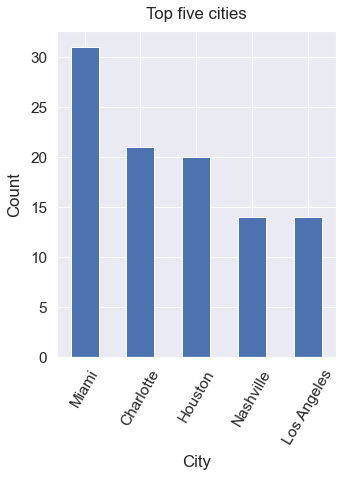

In [8]:
sb.set_style('white')
sb.set(font_scale=1.4)
df['City'].value_counts()[0:5].plot(kind='bar', figsize=(5, 6), rot=60)
plt.xlabel("City", labelpad=8)
plt.ylabel("Count", labelpad=8)
plt.title("Top five cities", y=1.02);

In [9]:
df['Severity'].value_counts()

2    746
4     41
3     39
1     21
Name: Severity, dtype: int64

(<AxesSubplot:xlabel='Severity', ylabel='count'>,)

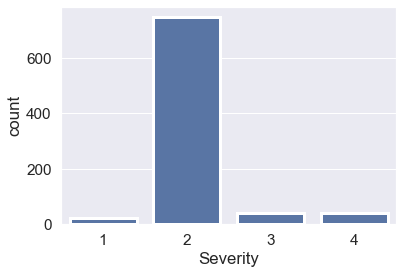

In [10]:
sb.countplot(x='Severity', data=df, color='b', lw=3),


In [11]:
df['Sunrise_Sunset'].value_counts()


Day      517
Night    330
Name: Sunrise_Sunset, dtype: int64

In [12]:
df['Start_Time']=pd.to_datetime(df['Start_Time'])
df['End_Time']=pd.to_datetime(df['End_Time'])

In [13]:
df['hour']=df.Start_Time.dt.hour
df['day']=df.Start_Time.dt.day
df['weekday']=df.Start_Time.dt.day_name()

In [14]:
df.head()

,id,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,hour,day,weekday
4,A-2792470,2,2020-01-22 08:05:34+00:00,2020-01-22 12:05:34+00:00,42.879050,-121.831060,42.879050,-121.831060,0.000,At Silver Lake Rd/W Boundary Rd - Accident.,...,False,False,False,Day,Day,Day,Day,8,22,Wednesday
20,A-1748546,2,2020-02-12 14:19:06+00:00,2020-02-12 15:03:58+00:00,40.649540,-73.899460,40.649540,-73.899460,0.000,Accident on Farragut Rd at 103rd St.,...,False,False,False,Day,Day,Day,Day,14,12,Wednesday
39,A-1775922,2,2020-09-11 00:34:18+00:00,2020-09-11 03:06:45+00:00,39.446164,-77.391525,39.446844,-77.389785,0.104,MD 26 EAST AT N MARKET ST,...,False,True,False,Night,Night,Night,Night,0,11,Friday
40,A-341254,2,2020-10-21 16:01:38+00:00,2020-10-21 17:16:51+00:00,44.768590,-93.958306,44.771278,-93.951868,0.366,Incident on US-212 EB near CR-31 Drive with ca...,...,False,False,False,Day,Day,Day,Day,16,21,Wednesday
41,A-1607126,2,2020-11-23 12:50:30+00:00,2020-11-24 03:17:19+00:00,25.897225,-80.244818,25.897997,-80.243550,0.095,Slow traffic on FL-916 - FL-9 from NW 136th St...,...,False,False,False,Day,Day,Day,Day,12,23,Monday


In [15]:
df['weekday'].value_counts()


Monday       156
Thursday     145
Tuesday      144
Wednesday    137
Friday       125
Saturday      72
Sunday        68
Name: weekday, dtype: int64

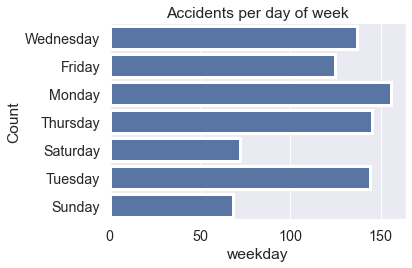

In [16]:
sb.set(style='darkgrid', font_scale=1.3)
sb.countplot(y='weekday', data=df, color='b', lw=3  );
plt.xlabel('weekday')
plt.ylabel('Count')
plt.title("Accidents per day of week");
plt.tight_layout()

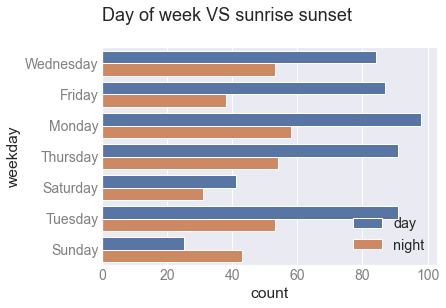

In [17]:
sb.countplot(data=df,y='weekday',hue='Sunrise_Sunset');
sb.despine()
ax = plt.gca()
ax.tick_params(axis='both', colors='gray', labelsize=14, length=0)
plt.title("Day of week VS sunrise sunset\n",
          fontsize=18, loc='left'
         );
plt.legend(['day','night'], frameon=False)


The number of accidents on working days is more than the weekend
More accidents during the day than at night